In [1]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

## 安裝 Jieba
- 在網路全部都通的情況下
    - pip install jieba
- 假設SSL 憑證無法讓你連到pypi 時
    - pip install --index-url=http://pypi.python.org/simple/ --trusted-host pypi.python.org  jieba
    
- 假設沒有網路環境的時候
    - 從 https://pypi.python.org/pypi/jieba/ 下載套件
    - 解壓縮zip 檔
    - python setup.py install
    
- 注意: 要重啟 kernel

In [3]:
! pip install --index-url=http://pypi.python.org/simple/ --trusted-host pypi.python.org  jieba

  Running setup.py bdist_wheel for jieba: started
  Running setup.py bdist_wheel for jieba: finished with status 'done'
  Stored in directory: C:\Users\befun\AppData\Local\pip\Cache\wheels\ce\32\de\c2be1db5f30804bc7f146ff698c52963f8aa11ba5049811b0d
Successfully built jieba


In [2]:
import jieba
jieba.add_word('過世')
a = '女子遊越南感染登革熱 住院7天過世'
for w in jieba.cut(a):
    print(w)

女子
遊
越南
感染
登革熱
 
住院
7
天
過世


In [8]:
news = '（中央社記者陳偉婷台北25日電）疾管署副署長羅一鈞今天說，一名37歲女子到越南旅遊，回國後發燒、肌肉痛，住院7天因敗血性休克等病症過世；為今年登革熱境外移入死亡第2例，民眾去東南亞一定要注意防蚊。'

import re
re.split('、|；|，|）|（|。', news)

['',
 '中央社記者陳偉婷台北25日電',
 '疾管署副署長羅一鈞今天說',
 '一名37歲女子到越南旅遊',
 '回國後發燒',
 '肌肉痛',
 '住院7天因敗血性休克等病症過世',
 '為今年登革熱境外移入死亡第2例',
 '民眾去東南亞一定要注意防蚊',
 '']

In [11]:
import jieba
for w in jieba.cut('大巨蛋案對市府同仁下封口令？柯P否認', cut_all=True):
    print(w)

' '.join(jieba.cut('大巨蛋案對市府同仁下封口令？柯P否認', cut_all=True))

大
巨蛋
案
對
市府
同仁
下
封口
封口令
口令


柯
P
否
認


'大 巨蛋 案 對 市府 同仁 下 封口 封口令 口令   柯 P 否 認'

In [12]:
' '.join(jieba.cut('大巨蛋案對市府同仁下封口令？柯P否認'))

'大 巨蛋 案對 市府 同仁 下 封口令 ？ 柯 P 否認'

In [16]:
jieba.load_userdict('localdict.txt')

In [17]:
' '.join(jieba.cut('大巨蛋案對市府同仁下封口令？柯P否認'))

'大巨蛋 案對 市府 同仁 下 封口令 ？ 柯P 否認'

In [18]:
import jieba.posseg as pseg
words=pseg.cut("大巨蛋案對市府同仁下封口令？柯P否認")
for w in words:
    print(w.word,w.flag)

大巨蛋 x
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
柯P x
否認 v


In [21]:
import jieba
#jieba.add_word('登革熱', 100 ,'nr')
jieba.add_word('登革熱')
jieba.del_word('登革熱')
s = '疾管署監測資料顯示，國內上週新增4例登革熱境外移入病例及1例自越南移入病例死亡'
for w in jieba.cut(s):
    print(w)

疾管署
監測
資料
顯示
，
國內
上
週
新增
4
例登革熱
境外
移入
病例
及
1
例自
越南
移入
病例
死亡


In [22]:
for w in jieba.tokenize(s):
    print(w)

('疾管署', 0, 3)
('監測', 3, 5)
('資料', 5, 7)
('顯示', 7, 9)
('，', 9, 10)
('國內', 10, 12)
('上', 12, 13)
('週', 13, 14)
('新增', 14, 16)
('4', 16, 17)
('例登革熱', 17, 21)
('境外', 21, 23)
('移入', 23, 25)
('病例', 25, 27)
('及', 27, 28)
('1', 28, 29)
('例自', 29, 31)
('越南', 31, 33)
('移入', 33, 35)
('病例', 35, 37)
('死亡', 37, 39)


In [26]:
sentence = '那我們酸民婉君也可以報名嗎'
for i in range(0, len(sentence) - 2 + 1):
    print(sentence[i:i+2])

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


In [27]:
sentence = '那我們酸民婉君也可以報名嗎'
for i in range(0, len(sentence) - 3 + 1):
    print(sentence[i:i+3])

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


In [30]:
s = '疾管署監測資料顯示，國內上週新增4例登革熱境外移入病例及1例自越南移入病例死亡'
def ngram(article ,  n = 2):
    for i in range(0, len(article) - n + 1):
        print(article[i:i+n])
ngram(s, 2)

疾管
管署
署監
監測
測資
資料
料顯
顯示
示，
，國
國內
內上
上週
週新
新增
增4
4例
例登
登革
革熱
熱境
境外
外移
移入
入病
病例
例及
及1
1例
例自
自越
越南
南移
移入
入病
病例
例死
死亡


In [31]:
a = ['a', 'b', 'a', 'c', 'a', 'b']
from collections import Counter
c = Counter(a)
c

Counter({'a': 3, 'b': 2, 'c': 1})

In [36]:
def ngram(article ,  n = 2):
    words = []
    for i in range(0, len(article) - n + 1):
        words.append(article[i:i+n])
    return words

res = ngram(s, 3)

from collections import Counter
c = Counter(res)
c.most_common(5)

[('移入病', 2), ('入病例', 2), ('疾管署', 1), ('管署監', 1), ('署監測', 1)]

In [46]:
text='衛生福利部疾病管制署長周志浩今天在記者會中表示，近期登革熱境外移入病例數增加，國內登革熱疑似病例通報數呈上升趨勢，且正值登革熱流行期，民眾必須格外小心提防，落實「巡、倒、清、刷」的防蚊步驟。'
delimiter = '，|、|「|」|。'
import re
re.split(delimiter, text)

['衛生福利部疾病管制署長周志浩今天在記者會中表示',
 '近期登革熱境外移入病例數增加',
 '國內登革熱疑似病例通報數呈上升趨勢',
 '且正值登革熱流行期',
 '民眾必須格外小心提防',
 '落實',
 '巡',
 '倒',
 '清',
 '刷',
 '的防蚊步驟',
 '']

In [47]:
a='國內登革熱疑似病例通報數呈上升趨勢'
a.replace('登革熱', '')

'國內疑似病例通報數呈上升趨勢'

In [51]:
a
''.join(a.split('登革熱'))

'國內疑似病例通報數呈上升趨勢'

In [53]:
def removeKey(text, keyword):
    for key in keyword:
        text = text.replace(key,'')
    return text

def removeKey2(text, keyword):
    for key in keyword:
        text = ''.join(text.split(key))
    return text

a='國內登革熱疑似病例通報數呈上升趨勢'
removeKey(a, ['登革熱', '病例'])

removeKey2(a, ['登革熱', '病例'])

'國內疑似通報數呈上升趨勢'

## 實做長詞優先法

In [ ]:
text='衛生福利部疾病管制署長周志浩今天在記者會中表示，近期登革熱境外移入病例數增加，國內登革熱疑似病例通報數呈上升趨勢，且正值登革熱流行期，民眾必須格外小心提防，落實「巡、倒、清、刷」的防蚊步驟。'

In [58]:
def ngram(sentence, n = 2):
    words = []
    for i in range(0, len(sentence) - n + 1):
        words.append(sentence[i:i+n])
    return words

In [ ]:
def removeKey(text, keyword):
    for key in keyword:
        text = text.replace(key,'')
    return text

In [59]:
import re
delimiter = '，|、|「|」|。'
sentence_ary = re.split(delimiter, text)

In [63]:
keywords = ['疾管署']
terms    = []
for sentence in sentence_ary:
    sentence = removeKey(sentence, keywords)
    terms.extend(ngram(sentence, 2))
#print(terms)

In [67]:
from collections import Counter
threshold = 3
c = Counter(terms)
for word, cnt in c.items():
    if cnt >= threshold:
        keywords.append(word)

## 長詞優先法(完整版)

In [82]:
text='''
（中央社記者陳偉婷台北25日電）疾管署副署長羅一鈞今天說，一名37歲女子到越南旅遊，回國後發燒、肌肉痛，住院7天因敗血性休克等病症過世；為今年登革熱境外移入死亡第2例，民眾去東南亞一定要注意防蚊。

衛生福利部疾病管制署長周志浩今天在記者會中表示，近期登革熱境外移入病例數增加，國內登革熱疑似病例通報數呈上升趨勢，且正值登革熱流行期，民眾必須格外小心提防，落實「巡、倒、清、刷」的防蚊步驟。

疾管署監測資料顯示，國內上週（9月18日至9月24日）新增4例登革熱境外移入病例及1例自越南移入病例死亡，近1個月境外移入個案感染國家以越南為多，今年截至9月24日累計229例境外移入病例（含2例死亡），本土病例3例。

根據疾管署網站資料，一般感染登革熱者，若聽醫師囑咐，多休息、多喝水、適時服用退燒藥，通常在感染後兩週左右可自行痊癒，但若是先後感染不同型別的登革病毒，有更高機率導致較嚴重的臨床症狀，如果沒有及時就醫或治療，死亡率可以高達20%以上。

羅一鈞說，最近一例境外移入死亡個案是比較少見的年輕人感染卻致死狀況。這名北部的37歲女性8月時到北越遊玩，8月31日回國，9月6日出現發燒、肌肉痠痛、關節痛等症狀，當天就住院，但仍不幸在住院7天因敗血性休克等病症過世。

羅一鈞表示，這名患者過去沒有感染登革熱紀錄，且沒有慢性病，卻因登革病毒致死，推測可能是她感染的第一型登革病毒比較凶猛，加上年輕人的免疫反應有時候比較強，病毒入侵後引發大量的免疫系統激素反應，旺盛的免疫激素有可能破壞器官組織。

這名個案的狀況較為少見，不過，羅一鈞說，登革熱仍有致命風險，仍須提醒民眾，正值國慶連假的旅遊旺季，如果民眾要去東南亞，因當地氣溫偏高，登革熱正流行，民眾遊玩一定要做好防蚊措施。

回國後如有發燒、頭痛、後眼窩痛、肌肉關節痛、出疹等症狀，應儘速就醫，並主動告知近期旅遊活動史，以利及早診斷及通報
'''
keywords = []
threshold = 5

In [83]:
delimiter = '，|、|「|」|。'
sentence_ary = re.split(delimiter, text)

for k in range(4,1,-1):
    # 產生n-gram 詞
    terms    = []
    for sentence in sentence_ary:
        sentence = removeKey(sentence, keywords)
        terms.extend(ngram(sentence, k))
        
    # 統計n-gram, 將超過一定次數(閥值)的資料取出
    c = Counter(terms)
    for word, cnt in c.items():
        if cnt >= threshold:
            keywords.append(word)

In [84]:
keywords

['境外移入', '登革熱', '死亡', '民眾', '\n\n', '病例', '感染']

## 長詞優先法(超級完整版)

In [113]:
import re
from collections import Counter

def ngram(sentence, n = 2):
    words = []
    for i in range(0, len(sentence) - n + 1):
        words.append(sentence[i:i+n])
    return words

def removeKey(text, keyword):
    for key in keyword:
        text = text.replace(key,'')
    return text

def longTermFirst(article, keywords, threshold):
    delimiter = '，|、|「|」|。|\n'
    sentence_ary = re.split(delimiter, article)

    for k in range(4,1,-1):
        # 產生n-gram 詞
        terms    = []
        for sentence in sentence_ary:
            sentence = removeKey(sentence, keywords)
            terms.extend(ngram(sentence, k))

        # 統計n-gram, 將超過一定次數(閥值)的資料取出
        c = Counter(terms)
        for word, cnt in c.items():
            if cnt >= threshold:
                keywords.append(word)
                
    # 回傳關鍵字詞
    return keywords

In [123]:
article = '''
時序雖然進入秋天，但還是處在登革熱高峰期，民眾千萬別輕忽自家積水容器！桶、缸、盆、甕為積水大宗物件，緊接著是各式底盤類及杯瓶碗罐盒類，其他馬桶、帆布、水箱等等也都是孑孓生長「熱區」，家中的這些物品需要多加留意，別老盯著手機快去巡一巡，確保沒有孑孓在這些角落裏頭游泳吧！

高雄市環保局呼籲，雖然已來到9月中下旬即將進入秋季，但依照過去數年經驗顯示，登革熱疫情高峰均約為每年7~11月，對於登革熱疫情仍不可輕忽，需持續加強清除居住環境週遭積水容器，環保局同時也提醒民眾如被發現登革熱病媒蚊孑孓，均依廢棄物清理法舉發，裁處金額為新臺幣1,500~6,000元整，若再次發現，將提高罰鍰，請民眾須妥善管理環境，落實環境「巡、倒、清、刷」，遠離登革熱，需民眾與政府一同努力。

造成登革熱傳染主要因子為登革熱病毒及斑蚊，其中斑蚊密度與陽性容器具有密不可分之關係，依環保局分析106年近3個月(截至9月15日為止)之陽性容器態樣，發現最常見積水容器態樣為桶、缸、盆、甕類，其次為各式底盤類，以及杯瓶碗罐盒類。其中桶、缸、盆、甕類佔積水容器約47%，而各式底盤類及杯瓶碗罐盒類佔約11%，其他則為馬桶、帆布、水箱等等；而在桶、缸、盆、甕類發現病媒蚊孑孓則佔最大宗，因此請民眾仍須加強清除居家環境週遭積水容器，以避免病媒蚊孳生。

此外，於進行孳生源巡檢時，菜園空地及廢棄輪胎內發現重大孳生源亦為數不少；菜園空地內常發現民眾利用容器儲水習慣或遭丟棄空瓶空罐，因菜園空地使用人或所有人疏於管理，導致儲水容器或空瓶空罐產生積水致孳生病媒蚊孑孓；另外廢棄輪胎常被民眾拿來當作防護之用，惟輪胎內溝積水不易排出，常孳生病媒蚊孑孓，民眾也要多加留意。'''
keywords = []
threshold = 5

In [126]:
important_words = longTermFirst(article, keywords, threshold)
important_words

['積水容器', '登革熱', '病媒蚊', '民眾', '孑孓', '發現', '孳生']

In [128]:
with open('localdict.txt', 'a', encoding = 'UTF-8') as f:
    for word in important_words:
        f.write('{} {} {}\n'.format(word, 100, 'n'))

## 使用網路爬蟲擴增字典

In [132]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://news.ltn.com.tw/news/world/breakingnews/2205755')
soup = BeautifulSoup(res.text, 'html.parser')
for keywords in soup.select('.keyword a'):
    print(keywords.text)

台灣
杜特蒂
毒品
竹聯幫
菲律賓


In [150]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/zh-tw/唐納·川普', verify=False)
soup = BeautifulSoup(res.text, 'html.parser')
for word in soup.select('#mw-content-text p b'):
    print(word.text)

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


美國總統
現任
政策立場
國際訪問
2016年美國總統選舉
俄羅斯爭議
唐納·約翰·川普


In [139]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/zh-cn/%E9%AA%A8%E7%97%9B%E7%86%B1%E7%97%87', verify=False)
soup = BeautifulSoup(res.text, 'html.parser')
for word in soup.select('p')[0].select('b'):
    print(word.text)

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


登革热
骨痛热症
断骨热
天狗热


## 同義詞產生器

In [174]:
import requests
from bs4 import BeautifulSoup

wiki = 'https://zh.wikipedia.org/{}/{}'
def getSynonym(word):
    synonym = []
    res = requests.get('https://zh.wikipedia.org/zh-tw/{}'.format(word), verify=False, allow_redirects=True)
    soup = BeautifulSoup(res.text, 'html.parser')
    for word in soup.select('#mw-content-text p')[0].select('b'):
        synonym.append(word.text)
    res = requests.get('https://zh.wikipedia.org/zh-cn/{}'.format(word), verify=False, allow_redirects=True)
    soup = BeautifulSoup(res.text, 'html.parser')
    for word in soup.select('#mw-content-text p')[0].select('b'):
        synonym.append(word.text)
    return synonym

getSynonym('疟疾')

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['瘧疾', '打擺子', '冷熱病', '發瘧子']

In [187]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
res = requests.get('https://zh.wikipedia.org/zh-tw/%E7%96%9F%E7%96%BE', verify=False)
soup = BeautifulSoup(res.text, 'html.parser')
translations = []
for entry in soup.select('.interlanguage-link'):
    dic = {}
    dic['link']  = entry.select('a')[0]['href']
    dic['title'] = entry.select('a')[0]['title']
    dic['lang']  = entry.select('a')[0]['lang']
    dic['alias'] = entry.select('a')[0].text
    dic['name']  = unquote(dic['link'].split('/')[-1])
    translations.append(dic)

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [204]:
import pandas
df = pandas.DataFrame(translations)
df = df[df['lang'].isin(['ko', 'ja', 'th', 'id', 'vi', 'hi'])]
#df.to_csv('translations.csv', encoding='utf-8-sig')
df.to_excel('translations.xlsx')

In [200]:

df[df.title.str.contains('印')]


,alias,lang,link,name,title
48,हिन्दी,hi,https://hi.wikipedia.org/wiki/%E0%A4%AE%E0%A4%...,मलेरिया,मलेरिया – 印地文
54,Bahasa Indonesia,id,https://id.wikipedia.org/wiki/Malaria,Malaria,Malaria – 印尼文


In [186]:
from urllib.parse import unquote
unquote('%D9%85%D9%84%D8%A7%D8%B1%D9%8A%D8%A7')

'ملاريا'

## Google Translate

In [218]:
import requests
payload = {
  'q': ['Sốt rét còn gọi là ngã nước là một chứng bệnh gây ra bởi ký sinh trùng tên Plasmodium[2] , lây truyền từ người này sang người khác khi những người này bị muỗi đốt. Bệnh phổ biến ở các khu vực nhiệt đới và cận nhiệt đới của châu Mỹ, châu Á và châu Phi. Mỗi năm có khoảng 515 triệu người mắc bệnh, từ 1 đến 3 triệu người tử vong - đa số là trẻ em ở khu vực phía nam sa mạc Sahara, châu Phi. 90% số ca tử vong xảy ra tại đây.[5] Sốt rét thường đi kèm với đói nghèo, lạc hậu,[6] và là một cản trở lớn đối với phát triển kinh tế.'],
  'target': 'zh-tw',

}   
key = '<key>'
res = requests.post('https://translation.googleapis.com/language/translate/v2?key={}'.format(key), verify=False, data = payload)
res.json()

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'data': {'translations': [{'detectedSourceLanguage': 'vi',
    'translatedText': '瘧疾也被稱為墮落，是一種由稱為瘧原蟲的寄生蟲引起的疾病，由於被蚊子咬傷而被人傳播。該病在美洲，亞洲和非洲的熱帶和亞熱帶地區普遍存在。每年約有5.15億人感染，其中一百三百萬人死亡，其中大多數是南部非洲和撒哈拉以南非洲的兒童。 90％的死亡發生在這裡。[5]瘧疾往往伴隨著貧困落後，是經濟發展的重大障礙。'}]}}

## 各國翻譯詞查找程式 - 完整版

In [223]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
import pandas

language = ['ko', 'ja', 'th', 'id', 'vi', 'hi']
def getTranslation(word, language):
    res = requests.get('https://zh.wikipedia.org/zh-tw/{}'.format(word), verify=False)
    soup = BeautifulSoup(res.text, 'html.parser')
    translations = []
    for entry in soup.select('.interlanguage-link'):
        dic = {}
        dic['link']  = entry.select('a')[0]['href']
        dic['title'] = entry.select('a')[0]['title']
        dic['lang']  = entry.select('a')[0]['lang']
        dic['alias'] = entry.select('a')[0].text
        dic['name']  = unquote(dic['link'].split('/')[-1])
        translations.append(dic)

    df = pandas.DataFrame(translations)
    df = df[df['lang'].isin(language)]
    df.to_excel('{}_translate.xlsx'.format(word))

In [224]:
language = ['ko', 'ja', 'th', 'id', 'vi', 'hi']
getTranslation('登革熱', language)

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## 取得文字詞頻

In [225]:
article = '''
東南亞地區登革熱仍處流行期，疾病管制署監測，上周新增9例登革熱境外移入病例，近期感染國家以越南最多，提醒民眾與醫師務必提高警覺；另近日持續有陣雨，該署也呼籲民眾要持續清除室內外積水容器，以免孳生病媒蚊。
疾管署副署長羅一鈞表示，上周新增9例登革熱境外移入病例，分別是越南4例、泰國2例，馬來西亞、緬甸及印度各1例，但通報數已連續3周下降，今年累計至上周止共有210例境外移入病例。
在本土疫情方面，今年僅3例本土登革熱病例，相較於往年疫情較和緩。羅一鈞說，推估是因2至3年前南部地區登革熱大流行，社區民眾防蚊意識提高，地方政府也謹慎督促，展現防疫成效。
羅一鈞表示，大多數的登革熱會自行痊癒，不會有嚴重症狀，但少數民眾可能重複感染，會導致登革出血熱，或者患有慢性病、65歲以上長者，都是登革熱中症的高危險群。
疾管署表示，越南、泰國、寮國、柬埔寨等國家的登革熱疫情，都處在上升或達高點，要格外注意防蚊；若在當地或返國途中出現發燒、後眼窩痛等症狀，返國後要盡快就醫，並告知旅遊史，協助醫師診斷。（江慧珺／台北報導）
'''

In [230]:
import jieba
jieba.load_userdict('localdict.txt')
# method 1
words = []
for w in jieba.cut(article):
    words.append(w)
words

# method 2
words = [w for w in jieba.cut(article)]

In [235]:
# method 1
dic = {}
for w in jieba.cut(article):
    if w not in dic:
        dic[w] = 1
    else:
        dic[w] = dic[w] + 1

import operator
swd = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)

In [239]:
from collections import Counter
words = [w for w in jieba.cut(article)]
c = Counter(words)
c.most_common(10)

[('，', 29),
 ('登革熱', 8),
 ('例', 7),
 ('、', 7),
 ('\n', 6),
 ('。', 6),
 ('病例', 4),
 ('民眾', 4),
 ('上周', 3),
 ('境外', 3)]

In [250]:
import re
import pandas
common_terms = []
for k, v in c.most_common(100):
    if len(k) >= 2 and re.match('[\u4E00-\u9FA5]+', k):
        #print(k,v)
        common_terms.append({'keyword': k, 'count': v})

In [252]:
df = pandas.DataFrame(common_terms)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


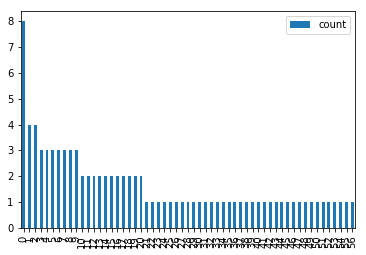

In [254]:
%pylab inline
df.plot(kind = 'bar')

## 抓取 Google 新聞

In [264]:
import requests
from bs4 import BeautifulSoup
phrase = 'デング熱'
res = requests.get('https://news.google.com/news/rss/search/section/q/{}/{}?hl=zh-TW&ned=tw'.format(phrase, phrase))
soup = BeautifulSoup(res.text, 'lxml')

In [278]:
news = []
for item in soup.select('item'):
    dic = {}
    #print(item)
    dic['title'] = item.select('title')[0].text
    #dic['link'] = item.select('link')[0].text
    dic['pubdate'] = item.select('pubdate')[0].text
    dic['description'] = item.select('description')[0].text
    dic['category'] = item.select('category')[0].text
    news.append(dic)

In [280]:
df = pandas.DataFrame(news)
df.head()

,category,description,pubdate,title
0,デング熱,"<table border=""0"" cellpadding=""2"" cellspacing=...","Tue, 19 Sep 2017 21:23:08 GMT",デング熱はいつ再流行してもおかしくない 研究者が明かす「蚊の厄介な吸血行動」
1,デング熱,"<table border=""0"" cellpadding=""2"" cellspacing=...","Thu, 21 Sep 2017 06:40:52 GMT",デング熱による死者はハノイが最多、狂犬病は全国56例
2,デング熱,"<table border=""0"" cellpadding=""2"" cellspacing=...","Wed, 20 Sep 2017 02:10:09 GMT",2014年に東京でパニックとなったデング熱 騒動沈静もいつ再流行するか分からない状況
3,デング熱,"<table border=""0"" cellpadding=""2"" cellspacing=...","Mon, 25 Sep 2017 10:15:52 GMT",海外医療通信2017年9月号【東京医科大学病院 渡航者医療センター】
4,デング熱,"<table border=""0"" cellpadding=""2"" cellspacing=...","Wed, 20 Sep 2017 15:10:10 GMT",デング熱、降雨増で感染拡大＝先週は４人死亡


In [296]:
import requests
from bs4 import BeautifulSoup

def getGoogleNews(phrase, lang):
    res = requests.get('https://news.google.com/news/rss/search/section/q/{}/{}?hl=zh-TW&ned=tw'.format(phrase, phrase))
    soup = BeautifulSoup(res.text, 'lxml')
    news = []
    for item in soup.select('item'):
        dic = {}
        #print(item)
        dic['title'] = item.select('title')[0].text
        dic['translation'] = googleTranslate(dic['title'])
        #dic['link'] = item.select('link')[0].text
        dic['pubdate'] = item.select('pubdate')[0].text
        dic['description'] = item.select('description')[0].text
        dic['category'] = item.select('category')[0].text
        dic['lang'] = lang
        news.append(dic)
    df = pandas.DataFrame(news)
    return df
    

In [298]:
danque = {
'hi':'डेंगू',
#'id':'Demam_berdarah_Dengue',
#'ja':'デング熱',
#'ko':'뎅기열',
#'th':'ไข้เด็งกี',
#'vi':'Bệnh_dengue'
  
}

newsary = []
for lang, phrase in danque.items():
    df = getGoogleNews(phrase, lang)
    newsary.append(df)

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\requests\packag

In [299]:
disease_df = pandas.concat(newsary)
disease_df.head()

,category,description,lang,pubdate,title,translation
0,डेंगू,"<table border=""0"" cellpadding=""2"" cellspacing=...",hi,"Wed, 27 Sep 2017 02:34:16 GMT",डेंगू से जिले में 2 और मौत,登革熱區共有2人死亡
1,डेंगू,"<table border=""0"" cellpadding=""2"" cellspacing=...",hi,"Wed, 27 Sep 2017 02:13:19 GMT","डेंगू से महिला की मौत,परिजनों ने डाक्टरों पर ल...",登革熱女子死亡，親戚因醫生而被控疏忽
2,डेंगू,"<table border=""0"" cellpadding=""2"" cellspacing=...",hi,"Wed, 27 Sep 2017 02:31:58 GMT",डेंगू की चपेट में आए एसपी सिटी,登記登記的SP城市
3,डेंगू,"<table border=""0"" cellpadding=""2"" cellspacing=...",hi,"Tue, 26 Sep 2017 07:37:59 GMT",क्या जीत रहा है डेंगू? मौसम बदलने से बढ़े बीमा...,什麼是登革熱？天氣變化增加，一天四十一天生病
4,डेंगू,"<table border=""0"" cellpadding=""2"" cellspacing=...",hi,"Wed, 27 Sep 2017 02:34:16 GMT",डेंगू से 13 साल की बच्ची की मौत,13歲的女孩死於登革熱


In [295]:
import requests
def googleTranslate(article):
    payload = {
      'q': [article],
      'target': 'zh-tw',

    }   
    key = '<key>'
    res = requests.post('https://translation.googleapis.com/language/translate/v2?key={}'.format(key), verify=False, data = payload)
    jd = res.json()
    return jd['data']['translations'][0]['translatedText']